In [21]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [22]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


In [23]:
df = pd.read_csv("../Python/Output/ExpVar.txt", sep='\t')
df.head()

,NoiseType,Noise,X,exp,Error Deviation,Error Minimum,Error Maximum,Value Deviation,Uncertainty,Mean,...,1.1,1.3,1.5,1.7,1.9,2.1,2.3,2.5,2.7,2.9
0,Gaussian,1.0,-100,3.720076e-44,0.996789,-0.455351,16.744552,8.005586e-44,8.031377e-44,2.398930e-44,...,0.141047,0.085854,0.071034,0.054170,0.045993,0.035262,0.032195,0.02964,0.020442,0.019419
1,Uniform,1.0,-100,3.720076e-44,0.672700,-0.381244,2.154881,5.402704e-44,8.031377e-44,2.160322e-44,...,0.184982,0.163984,0.146985,0.133487,0.121988,0.088491,0.000000,0.00000,0.000000,0.000000
2,Gaussian,1.0,-50,1.928750e-22,0.996789,-0.455351,16.744552,4.150661e-22,4.164032e-22,1.243775e-22,...,0.141047,0.085854,0.071034,0.054170,0.045993,0.035262,0.032195,0.02964,0.020442,0.019419
3,Uniform,1.0,-50,1.928750e-22,0.672700,-0.381244,2.154881,2.801143e-22,4.164032e-22,1.120064e-22,...,0.184982,0.163984,0.146985,0.133487,0.121988,0.088491,0.000000,0.00000,0.000000,0.000000
4,Gaussian,1.0,-20,2.061154e-09,0.996789,-0.455351,16.744552,4.435593e-09,4.449883e-09,1.329157e-09,...,0.141047,0.085854,0.071034,0.054170,0.045993,0.035262,0.032195,0.02964,0.020442,0.019419


In [24]:
sNoise = sorted(df['Noise'].unique())
sNoise

[1e-16,
 1e-15,
 1e-14,
 1e-13,
 1e-12,
 1e-11,
 1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 1.0]

# vs Noise vs X

In [25]:
def PlotSurface(value, noiseType, xlim=(-10,10), cmap=None):
    logz = (value == 'Uncertainty')
    dfOrderVsNoise = df[(df['NoiseType']==noiseType) & (df['X']>=xlim[0]) & (df['X']<=xlim[1])]\
                .pivot(index='Noise', columns='X', values=value)
    sOrder = dfOrderVsNoise.columns.values
    sNoise = dfOrderVsNoise.index.values if logz else dfOrderVsNoise.index.values
    sX, sY = np.meshgrid(sOrder, sNoise)
    sY = np.log10(sY)
    sZ = np.log10(dfOrderVsNoise.values) if logz else dfOrderVsNoise.values
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(30, -45) if logz else ax.view_init(30, 45)
    surf = ax.plot_surface( sX, sY, sZ, cmap=cmap if cmap else plt.cm.spring if logz else plt.cm.winter )
    cb = fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.15)
    
    ax.set_title(r'$e^{x \pm \delta x}$ with ' + noiseType + ' noise')
    
    ax.set_xlabel('X')
    sXTick = [sOrder[i] for i in range(0, len(sOrder), 2)]
    ax.set_xticks(sXTick, [f'{x}' for x in sXTick])
    
    ax.set_ylabel('Input Noise')
    sYTick = [sNoise[i] for i in range(0, len(sNoise), 3)]
    ax.set_yticks(np.log10(sYTick), [f'{y:.1e}' for y in sYTick])
    
    ax.set_zlabel(value)
    if value == 'Error Deviation':
        pass
        # TODO: adjust color range 
        # ax.set_zlim([0, 2])
        # cb.set_clim([0, 2])
    if logz:
        zMin = int(math.floor(np.min(sZ)))
        zMax = int(math.ceil(np.max(sZ)))
        sZTick = range(zMin, zMax, int(math.ceil((zMax - zMin)/10)))
        ax.set_zticks(sZTick, [f'1e{z:+}' for z in sZTick])

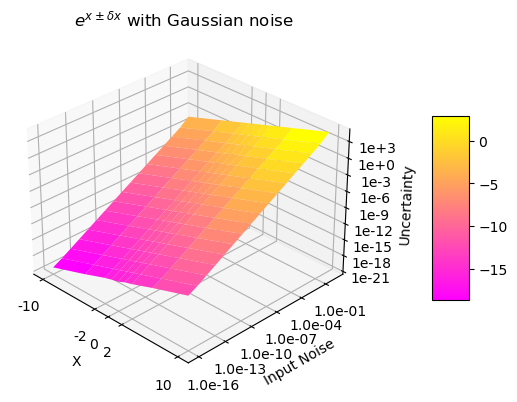

In [26]:
PlotSurface('Uncertainty', 'Gaussian')

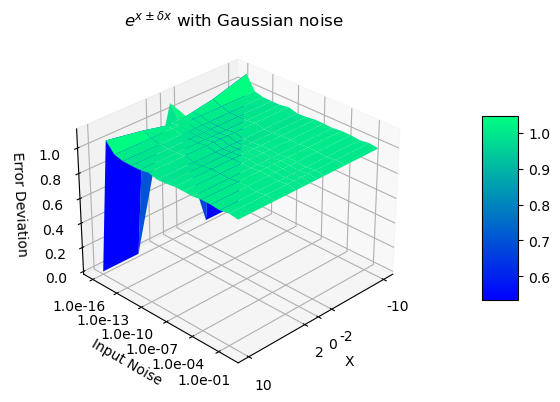

In [27]:
PlotSurface('Error Deviation', 'Gaussian')

# Deviation vs X

In [28]:
def PlotValues( sValue=['Value Deviation', 'Uncertainty'], 
                sNoise=[1, 1e-1, 1e-2, 1e-3], noiseType='Gaussian',
                sStyle=['+', '-', '--', 'x'], sColor = ['r','g','b','y','c','m'],
                logx=False, logy=True, xlim=[-10.3, +10.3], ylim=[1e-8, 1e+5], bbox=(1.15, 1.0)):
    fig, ax = plt.subplots()
    if logx:
        ax.set_xscale('log')
    if xlim:
        ax.set_xlim(xlim)
    if logy:
        ax.set_yscale('log')
    if ylim:
        ax.set_ylim(ylim)
    ax.set_title(r'$e^{x \pm \delta x}$ with ' + noiseType + ' noise')
    ax.set_xlabel('x')
    ax.set_ylabel(' or '.join(sValue))
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        for value, style in zip(sValue, sStyle):
            dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise) ].sort_values('X')
            if dfPlot.empty:
                continue
            ax.plot(dfPlot['X'], dfPlot[value], ''.join([color, style]), label=f'{noise} {value}', markersize=10)
    ax.legend(bbox_to_anchor=bbox)

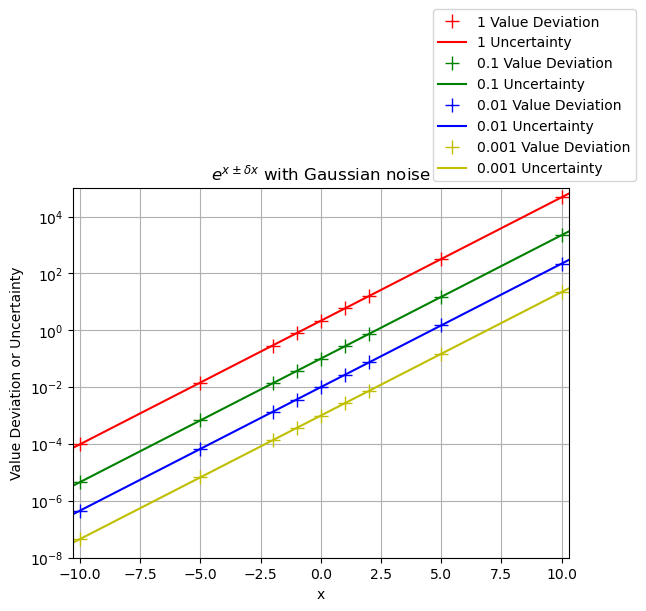

In [29]:
PlotValues()

In [30]:
def PlotErrorDev( noiseType='Gaussian', sNoise=[1, 1e-1, 1e-2, 1e-3],
                  sColor=['r','g','b','y','c','m'], xlim=[-10.3, +10.3], ylim=[1e-8, 1e+5] ):
    
    fig, ax = plt.subplots()
    ax.set_title(r'$e^{x \pm \delta x}$ with ' + noiseType + ' noise')
    ax.set_xlabel('x')
    if xlim:
        ax.set_xlim(xlim)
    ax.set_ylabel('Uncertainty or Value Deviation')
    ax.set_yscale('log')
    if ylim:
        ax.set_ylim(ylim)
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)].sort_values('X')
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['X'], dfPlot['Uncertainty'], ''.join([color, '-']), label=f'{noise} Uncertainty')
        ax.plot(dfPlot['X'], dfPlot['Value Deviation'], ''.join([color, 'x']), label=f'{noise} Value Deviation')

    ax2 = ax.twinx()
    ax2.set_ylabel('Error Deviation')
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)].sort_values('X')
        if dfPlot.empty:
            continue
        ax2.plot(dfPlot['X'], dfPlot['Error Deviation'], ''.join([color, '--']), label=f'{noise} Error Deviation')

    ax.legend(bbox_to_anchor=(1.4, 1.0))
    ax2.legend(bbox_to_anchor=(1.6, 0.25))

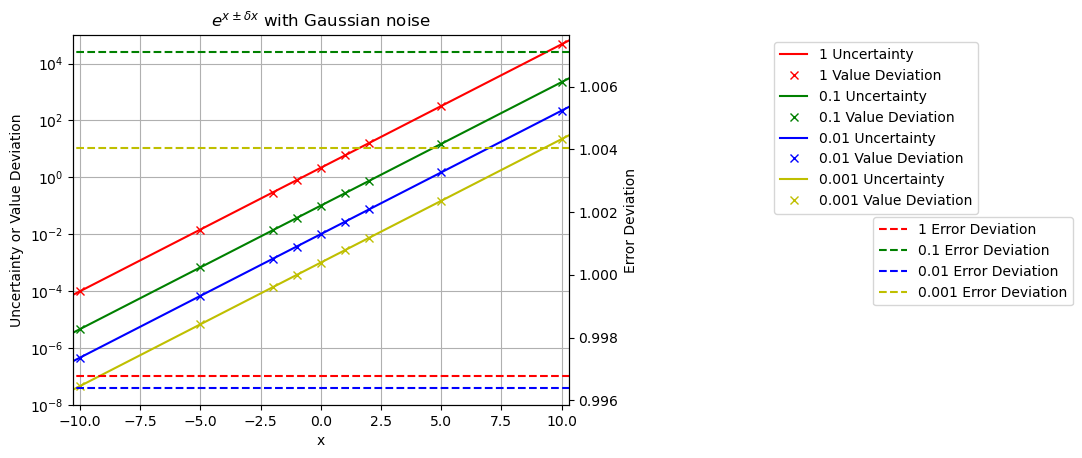

In [31]:
PlotErrorDev()

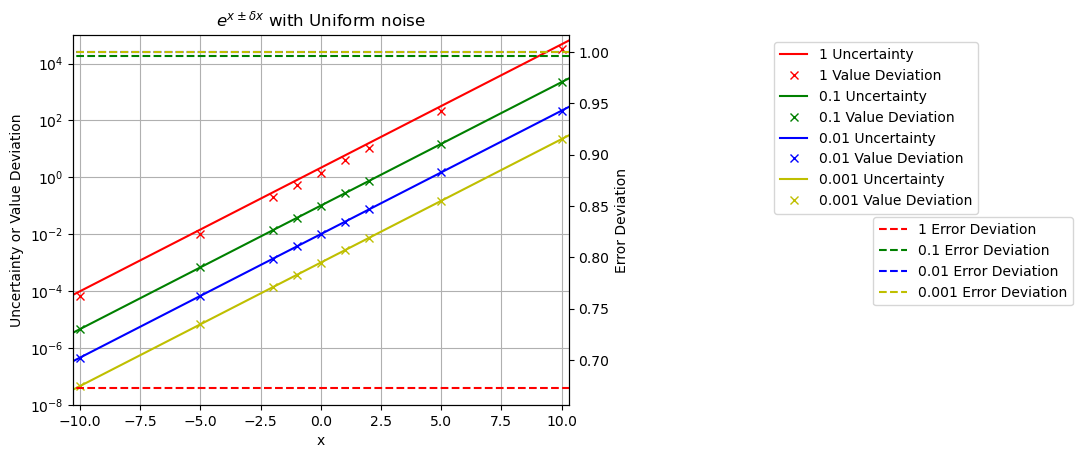

In [32]:
PlotErrorDev('Uniform')

In [33]:
def PlotErrorDev( noiseType='Gaussian', sNoiseStyleMarker=[(1,'-','<'), (1e-1,'-.','>'), (1e-2,':','^'), (1e-3,'--','v')],
                  xlim=[-10.3, +10.3], ylim=[1e-8, 1e+5] ):
    
    fig, ax = plt.subplots()
    ax.set_title(r'$e^{x \pm \delta x}$ with ' + noiseType + ' noise')
    ax.set_xlabel('x')
    if xlim:
        ax.set_xlim(xlim)
    ax.set_ylabel('Uncertainty or Value Deviation')
    ax.set_yscale('log')
    if ylim:
        ax.set_ylim(ylim)
    plt.grid(True)
    for noise, style, marker in sNoiseStyleMarker:
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)].sort_values('X')
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['X'], dfPlot['Uncertainty'], f'k{style}', label=f'{noise} Uncertainty')
        ax.plot(dfPlot['X'], dfPlot['Value Deviation'], f'k{marker}', label=f'{noise} Value Deviation')

    ax2 = ax.twinx()
    ax2.set_ylabel('Error Deviation')
    for noise, style, marker in sNoiseStyleMarker:
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)].sort_values('X')
        if dfPlot.empty:
            continue
        ax2.plot(dfPlot['X'], dfPlot['Error Deviation'], c='gray', ls=style, label=f'{noise} Error Deviation')

    ax.legend(bbox_to_anchor=(1.58, 0.5))
    ax2.legend(bbox_to_anchor=(1.15, 0.8))

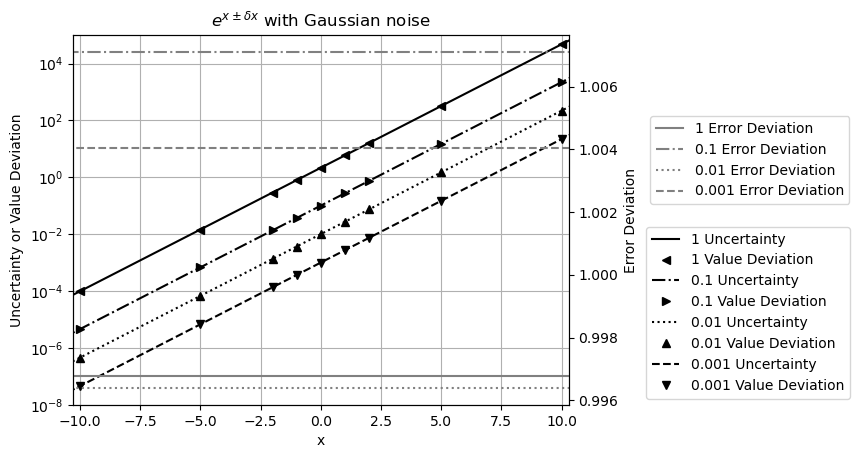

In [34]:
PlotErrorDev()

In [35]:
df[(df['NoiseType']=='Gaussian') & (df['Noise']>=1e-15) & (df['X']>-10) & (df['X']<10)]['Error Deviation'].describe()

count    112.000000
mean       1.000441
std        0.008570
min        0.987513
25%        0.994979
50%        0.996819
75%        1.005907
max        1.041657
Name: Error Deviation, dtype: float64

# Mean vs Bias

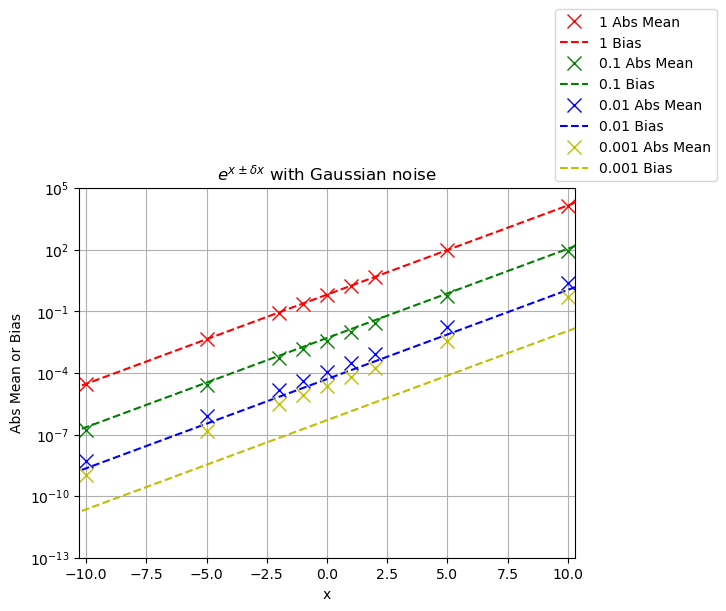

In [36]:
df['Abs Mean'] = abs(df['Mean'])
PlotValues(sValue=['Abs Mean', 'Bias'], sStyle=['x', '--'], ylim=[1e-13, 1e+5], bbox=(1.3, 1.0))

# Error Maximum and Minimum

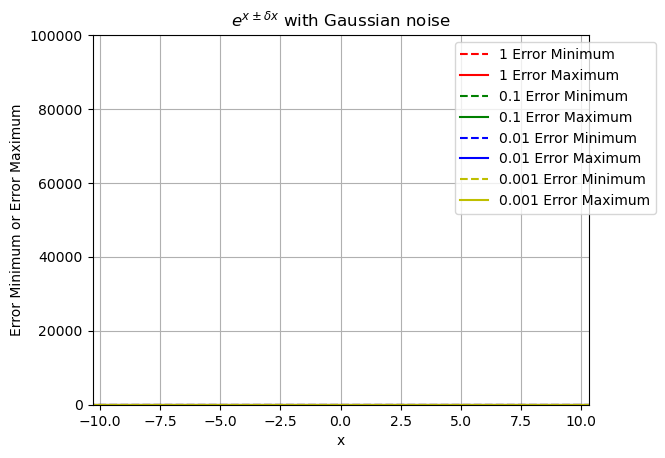

In [37]:
PlotValues(sValue=['Error Minimum', 'Error Maximum'], sStyle=['--', '-'], logy=False)

# Histogram

In [38]:
sHisto = [str(i/10) for i in range(-30, 32, 2)]
df[sHisto].head()

KeyError: "None of [Index(['-3.0', '-2.8', '-2.6', '-2.4', '-2.2', '-2.0', '-1.8', '-1.6', '-1.4',\n       '-1.2', '-1.0', '-0.8', '-0.6', '-0.4', '-0.2', '0.0', '0.2', '0.4',\n       '0.6', '0.8', '1.0', '1.2', '1.4', '1.6', '1.8', '2.0', '2.2', '2.4',\n       '2.6', '2.8', '3.0'],\n      dtype='object')] are in the [columns]"

In [ ]:
def PlotHisto( sNoiseType=['Uniform'], sNoise=df['Noise'].unique(), sX=df['X'].unique() ):
    df['algo'] = df['NoiseType'] + " " + df['Noise'].astype(str) + " " + df['X'].astype(str)
    dfPlot = df[(df['NoiseType'].isin(sNoiseType)) & (df['Noise'].isin(sNoise)) & (df['X'].isin(sX))].set_index('algo')
    # return dfPlot
    ax = dfPlot[sHisto].T.plot()
    ax.legend(bbox_to_anchor=(1.1, 1.05))    


In [ ]:
PlotHisto(sNoiseType=['Gaussian'], sNoise=[1e-12])

In [ ]:
PlotHisto(sNoiseType=['Gaussian'], sNoise=[1e-13])

In [ ]:
PlotHisto(sNoiseType=['Gaussian'], sNoise=[1e-14])

In [ ]:
PlotHisto(sNoiseType=['Gaussian'], sX=[0])

In [ ]:
PlotHisto(sNoiseType=['Uniform'], sX=[0])

In [ ]:
PlotHisto(sNoiseType=['Gaussian'], sNoise=[1e-12])